## Entropy
- Entropy (S) = c sigma i=1 (-Pi.log2(Pi))
- Entropy (S) = -Pyes.log2(Pyes) - Pno.log2(Pno)

### Information gain:
- It calculayes how much information a feature provide us about a class
- According to information gain it splites the node and forms the decision tree

- Gain(S, A) = Entropy(S) - Σ [|Sv|/|S| * Entropy(Sv)], where S is the dataset, A is an attribute, Sv is a subset of S where attribute A has value v, and |Sv|/|S| is the weight of that subset. 

In [1]:
import pandas as pd
df=pd.read_csv("DecisionTree_Sports.csv")
df

,Day,Weather,Temperature,Humidity,Wind,Play_Sports?
0,Day 1,Sunny,Hot,High,Weak,No
1,Day 2,Sunny,Hot,High,Strong,No
2,Day 3,Cloudy,Hot,High,Weak,Yes
3,Day 4,Rain,Mild,High,Weak,Yes
4,Day 5,Rain,Cool,Normal,Weak,Yes
5,Day 6,Rain,Cool,Normal,Strong,No
6,Day 7,Cloudy,Cool,Normal,Strong,Yes
7,Day 8,Sunny,Mild,High,Weak,No
8,Day 9,Sunny,Cool,Normal,Weak,Yes
9,Day 10,Rain,Mild,Normal,Weak,Yes


In [3]:
import pandas as pd
df=pd.read_csv("DecisionTreeDataset -Num.csv")
df

,CGPA,Communication,Apptitude,Programming Skill,Job Offered
0,2,1,1,1,1
1,1,1,1,1,1
2,0,0,0,1,0
3,0,1,0,0,0
4,2,1,1,0,1
5,2,1,1,1,1
6,1,0,0,0,0
7,1,0,0,1,0
8,2,0,1,1,1
9,1,1,1,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CGPA               18 non-null     int64
 1   Communication      18 non-null     int64
 2   Apptitude          18 non-null     int64
 3   Programming Skill  18 non-null     int64
 4   Job Offered        18 non-null     int64
dtypes: int64(5)
memory usage: 848.0 bytes


In [5]:
x=df.drop('Job Offered',axis=1)
y=df['Job Offered']
print(x.shape)
print(y.shape)

(18, 4)
(18,)


In [6]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy')
model=dtree.fit(x,y)
y_pred=model.predict(x)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [7]:
dtree.get_depth()

3

In [8]:
from sklearn import tree
text_representation=tree.export_text(dtree)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- class: 0
|--- feature_2 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- class: 1



In [9]:
from sklearn import tree
text_representation=tree.export_text(dtree,feature_names=list(x.columns))
print(text_representation)

|--- Apptitude <= 0.50
|   |--- class: 0
|--- Apptitude >  0.50
|   |--- Communication <= 0.50
|   |   |--- CGPA <= 1.50
|   |   |   |--- class: 0
|   |   |--- CGPA >  1.50
|   |   |   |--- class: 1
|   |--- Communication >  0.50
|   |   |--- class: 1



In [10]:
from sklearn import metrics
cm=metrics.confusion_matrix(y,y_pred)
cm

array([[10,  0],
       [ 0,  8]], dtype=int64)

### confusion matrix:
    [[ TN , FP
     [ FN , TP]]
     
### sensitivity (for +ve)
    = TP/(FN + TP)

### specificity (for -ve)
    = TN/(FP + TN)

In [12]:
from sklearn import metrics
print("Sensitivity:",metrics.recall_score(y,y_pred,pos_label=1))
print("Specificity:",metrics.recall_score(y,y_pred,pos_label=0))
print("Accuracy:",metrics.accuracy_score(y,y_pred))

Sensitivity: 1.0
Specificity: 1.0
Accuracy: 1.0


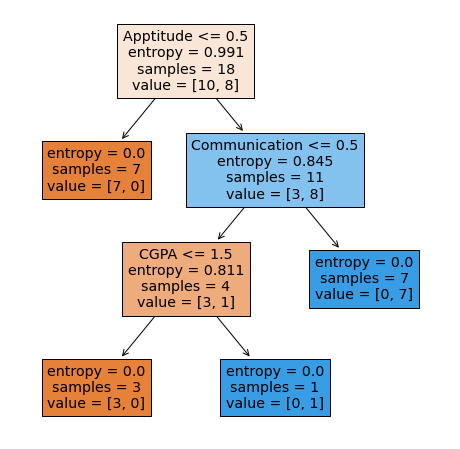

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plot_tree(dtree,feature_names=list(x.columns),filled=True)
plt.show()

In [34]:
import pandas as pd
df=pd.read_csv("DecisionTree_Sports.csv")
df

,Day,Weather,Temperature,Humidity,Wind,Play_Sports?
0,Day 1,Sunny,Hot,High,Weak,No
1,Day 2,Sunny,Hot,High,Strong,No
2,Day 3,Cloudy,Hot,High,Weak,Yes
3,Day 4,Rain,Mild,High,Weak,Yes
4,Day 5,Rain,Cool,Normal,Weak,Yes
5,Day 6,Rain,Cool,Normal,Strong,No
6,Day 7,Cloudy,Cool,Normal,Strong,Yes
7,Day 8,Sunny,Mild,High,Weak,No
8,Day 9,Sunny,Cool,Normal,Weak,Yes
9,Day 10,Rain,Mild,Normal,Weak,Yes


In [35]:
import numpy as np
df['Weather']=np.where(df['Weather']=='Sunny',2,np.where(df['Weather']=='Cloudy',1,0))
df['Temperature']=np.where(df['Temperature']=='Hot',2,np.where(df['Temperature']=='Mild',1,0))
df['Humidity']=np.where(df['Humidity']=='High',1,0)
df['Wind']=np.where(df['Wind']=='Strong',1,0)
df['Play_Sports?']=np.where(df['Play_Sports?']=='Yes',1,0)
df

,Day,Weather,Temperature,Humidity,Wind,Play_Sports?
0,Day 1,2,2,1,0,0
1,Day 2,2,2,1,1,0
2,Day 3,1,2,1,0,1
3,Day 4,0,1,1,0,1
4,Day 5,0,0,0,0,1
5,Day 6,0,0,0,1,0
6,Day 7,1,0,0,1,1
7,Day 8,2,1,1,0,0
8,Day 9,2,0,0,0,1
9,Day 10,0,1,0,0,1


In [36]:
x=df.drop(['Play_Sports?','Day'],axis=1)
y=df['Play_Sports?']
print(x.shape)
print(y.shape)

(14, 4)
(14,)


In [37]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy')
model=dtree.fit(x,y)
y_pred=model.predict(x)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [38]:
dtree.get_depth()

4

In [39]:
from sklearn import tree
text_representation=tree.export_text(dtree,feature_names=list(x.columns))
print(text_representation)

|--- Humidity <= 0.50
|   |--- Wind <= 0.50
|   |   |--- class: 1
|   |--- Wind >  0.50
|   |   |--- Weather <= 0.50
|   |   |   |--- class: 0
|   |   |--- Weather >  0.50
|   |   |   |--- class: 1
|--- Humidity >  0.50
|   |--- Weather <= 1.50
|   |   |--- Wind <= 0.50
|   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- Weather <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Weather >  0.50
|   |   |   |   |--- class: 1
|   |--- Weather >  1.50
|   |   |--- class: 0



In [40]:
from sklearn import metrics
cm=metrics.confusion_matrix(y,y_pred)
cm

array([[5, 0],
       [0, 9]], dtype=int64)

In [41]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y,y_pred))

Accuracy: 1.0


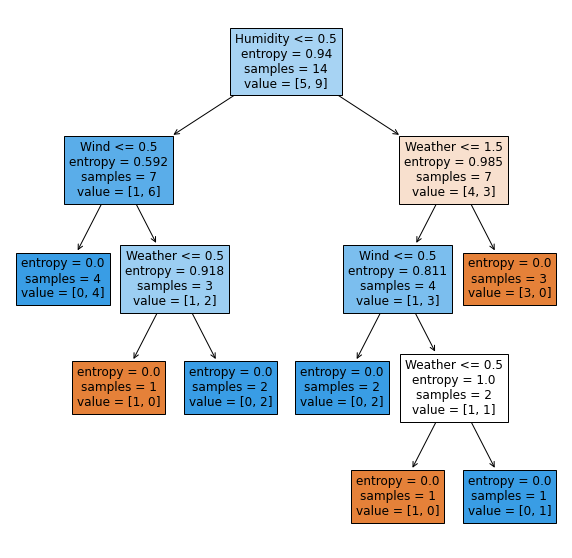

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(dtree,feature_names=list(x.columns),filled=True)
plt.show()